In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

X, y = load_iris(return_X_y=True, as_frame=True)

In [91]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10 )
plt.rc('ytick', labelsize=10)

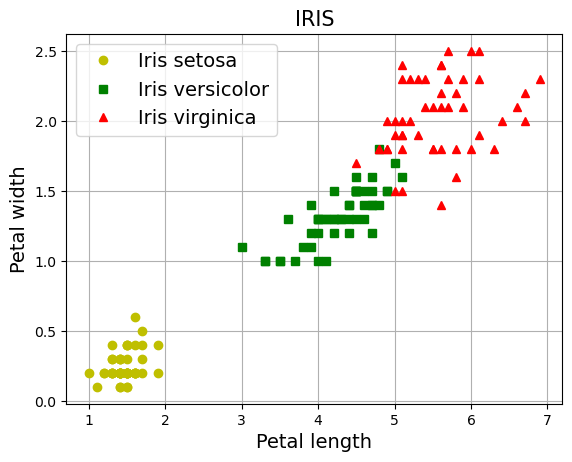

In [92]:
plt.plot(data[target==0, 2], data[target==0, 3], "yo", label="Iris setosa")
plt.plot(data[target==1, 2], data[target==1, 3], "gs", label="Iris versicolor")
plt.plot(data[target==2, 2], data[target==2, 3], "r^", label="Iris virginica")
plt.grid()
plt.title('IRIS', size=15)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=42)

In [94]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

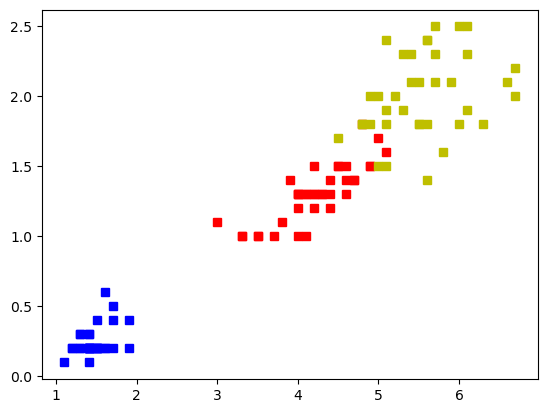

In [95]:
plt.plot(X_train[y_train==0, 2], X_train[y_train==0, 3], "bs", label="Setosa")
plt.plot(X_train[y_train==1, 2], X_train[y_train==1, 3], "rs", label="Versicolor")
plt.plot(X_train[y_train==2, 2], X_train[y_train==2, 3], "ys", label="Virginica")


Text(0, 0.5, 'Petal width')

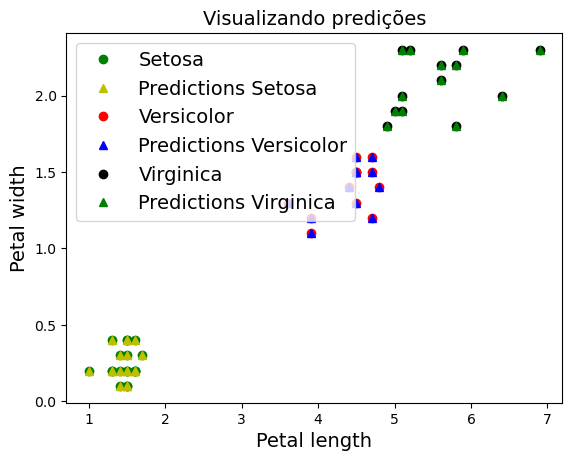

In [96]:
plt.plot(X_test[y_test==0, 2], X_test[y_test==0, 3], "go", label="Setosa")
plt.plot(X_test[y_pred==0, 2], X_test[y_pred==0, 3], "y^", label="Predictions Setosa")
plt.plot(X_test[y_test==1, 2], X_test[y_test==1, 3], "ro", label="Versicolor")
plt.plot(X_test[y_pred==1, 2], X_test[y_pred==1, 3], "b^", label="Predictions Versicolor")
plt.plot(X_test[y_test==2, 2], X_test[y_test==2, 3], "ko", label="Virginica")
plt.plot(X_test[y_pred==2, 2], X_test[y_pred==2, 3], "g^", label="Predictions Virginica")
plt.legend(loc='upper left')
plt.title('Visualizando predições')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [97]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='rbf')

clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)
y_decision_function = clf_svc.decision_function(X_test)


In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

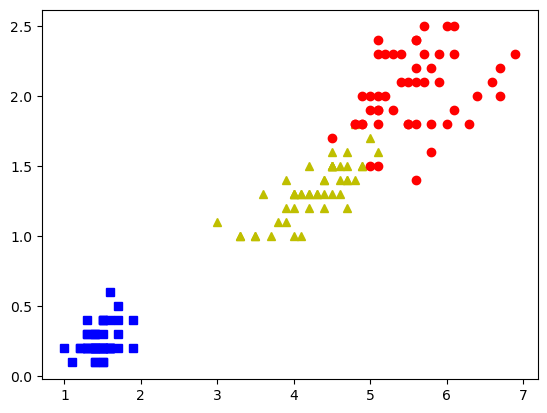

In [99]:
plt.plot(data[:, 2][target==0], data[:, 3][target==0], "bs")
plt.plot(data[:, 2][target==1], data[:, 3][target==1], "y^")
plt.plot(data[:, 2][target==2], data[:, 3][target==2], "ro")



In [100]:
iris.feature_names

# 2 - petal length (cm)
# 3 - petal width (cm)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [101]:
x_min, x_max = data[:, 2].min()-1, data[:, 2].max()+1
y_min, y_max = data[:, 3].min()-1, data[:, 3].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [102]:
# Para imprimir uma fronteira de decisão eu tenho que adaptar a classificação
clf_svc.fit(data[:,2:4], target)

# São 89900 dados com essa manipulação numpy e o predict acaba prenchendo consideravelmente as áreas de decisão
Z = clf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# dando um reshape em Z para realizar as linhas de decisão
Z = Z.reshape(xx.shape)

In [103]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0.  , -0.9 ],
       [ 0.02, -0.9 ],
       [ 0.04, -0.9 ],
       ...,
       [ 7.84,  3.48],
       [ 7.86,  3.48],
       [ 7.88,  3.48]])

Text(0, 0.5, 'petal width (cm)')

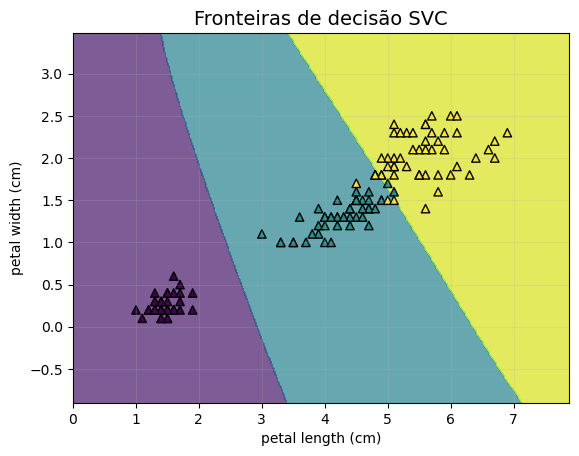

In [115]:
plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(data[:,2], data[:,3], c=y, edgecolors='k', marker='^')
plt.grid(alpha=0.2)
plt.title('Fronteiras de decisão SVC')
plt.xlabel('petal length (cm)', size=10)
plt.ylabel('petal width (cm)', size=10)